<a href="https://colab.research.google.com/github/dpriyabijosh/Depression_detection/blob/main/ELMo_model_Keras_Case1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import keras
import os
import re
import nltk
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from google.colab import drive
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
import gensim 
from gensim.models import Word2Vec 
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm.notebook import trange, tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Version:  2.9.2
Eager mode:  True
Hub version:  0.12.0
GPU is available


In [ ]:
elmo = hub.load("https://tfhub.dev/google/elmo/3")

In [ ]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/My Drive/Colab Notebooks/Models_v2"
os.chdir(path)

Mounted at /content/drive


In [ ]:
!pip install import-ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 38.5 MB/s 


importing Jupyter notebook from DepressionDetection_preprocessing.ipynb
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 7.4 MB/s 
     |████████████████████████████████| 110 kB 17.7 MB/s 


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11877 entries, 0 to 11876
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   11877 non-null  object
 1   label   11877 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 185.7+ KB


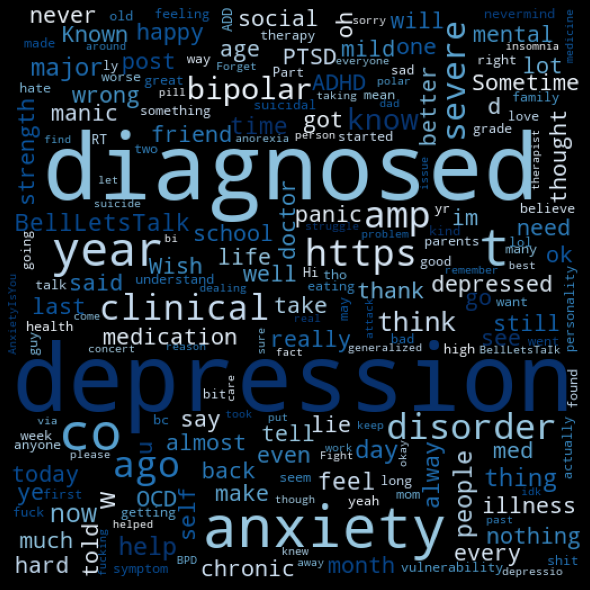

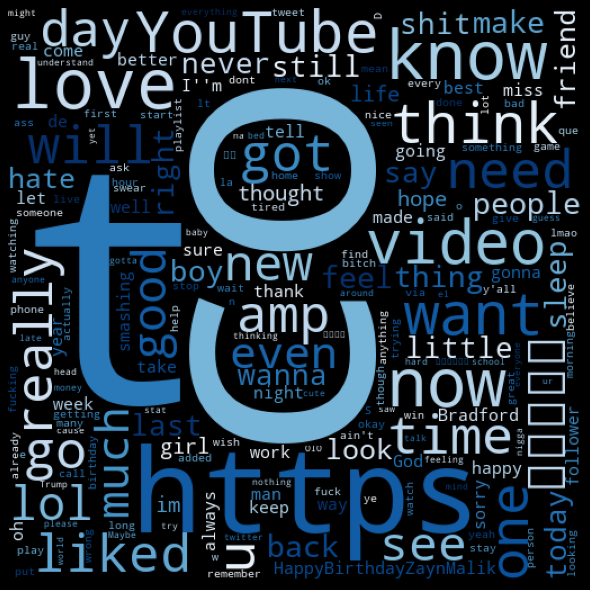

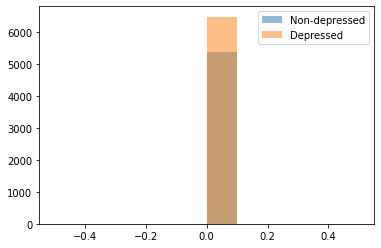

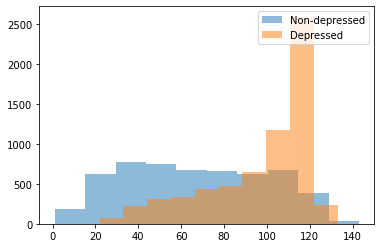

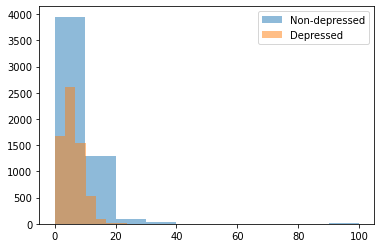

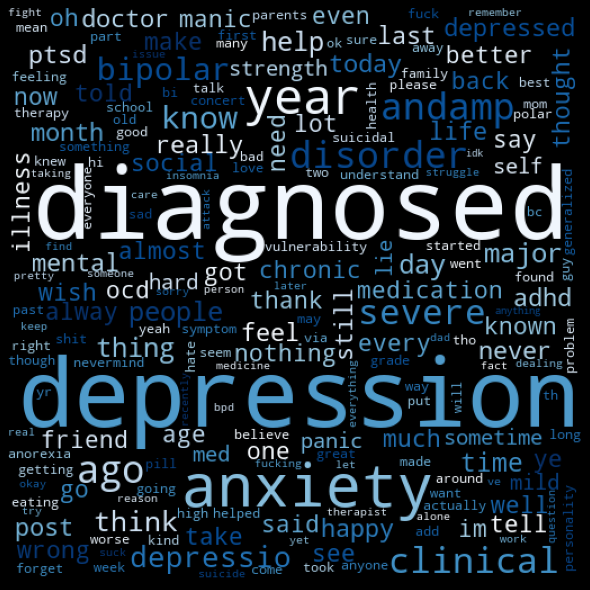

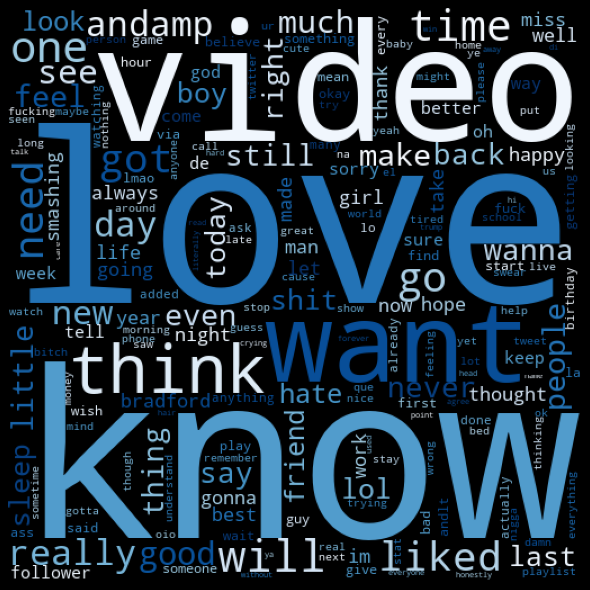

Total number of empty tweets
 tweet     
label    7
dtype: object
(11877, 2)
Initial size (11877, 2)
Shape after cleaning (11317, 2)
Initial size (11317, 2)
Shape after cleaning (11267, 2)
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Initial size (11877, 2)
Shape after cleaning (11315, 2)


In [ ]:
# Import from pre-processing notebook
#from DepressionDetection_preprocessing import *
import import_ipynb
from DepressionDetection_preprocessing import *

In [ ]:
data_raw = initail_dataload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##2.1 Train Dataset Preparation

2.1.1. With Intensive cleaning

In [ ]:
data_clean = data_raw.copy()

In [ ]:
data_clean['tweet'] = data_clean['tweet'].apply(clean_tweet)

In [ ]:
 # Removing empty rows
data_clean = clean_empty_rows(data_clean,'tweet')

Initial size (11877, 2)
Shape after cleaning (11315, 2)


In [ ]:
data_clean.head(5)

,tweet,label
0,happy birthday main squeeze luv mazzoni cannot...,0
1,wonder many lie tell last year smh that shit b...,0
2,sooo happy proud tyty king love much love more...,0
3,heyyyy die god abeg let marry diz kain useless...,0
4,see lie,0


2.1.1. With necesintesary cleaning

In [ ]:
data = data_raw.copy()

In [ ]:
! pip install tweet-preprocessor
import preprocessor as p
from tqdm.notebook import tqdm
tqdm.pandas()

# Tweet pre-processing
def tweet_preprocessing(text):
  text = text.replace("#","")

  # Replace '&amp;' with '&'
  text = re.sub(r'&amp;', '&', text)

  # Remove trailing whitespace
  text = re.sub(r'\s+', ' ', text).strip()

  return p.clean(text)
# Tweet pre-processing
def tweet_preprocessing(text):
  text = text.replace("#","")

  # Replace '&amp;' with '&'
  text = re.sub(r'&amp;', '&', text)

  # Remove trailing whitespace
  text = re.sub(r'\s+', ' ', text).strip()

  return p.clean(text)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data['tweet'] = data.tweet.apply(tweet_preprocessing)

In [ ]:
 # Removing empty rows
data = clean_empty_rows(data,'tweet')

In [ ]:
data.tail()

,tweet,label
11872,Hey if any of you cut yourself or used too.. I...,1
11873,I'm diagnosed with depression but I'm not cutt...,1
11874,"I'm diagnosed with Depression, Bipolar, and AD...",1
11875,I'm diagnosed with depression... I don't tweet...,1
11876,"When I think about it, I know I'm diagnosed wi...",1


## 2.2 Test dataset Preparation (Doing small cleaning)


In [ ]:
# Load data and set labels
test_data_raw = pd.read_csv('/content/drive/My Drive/Colab Notebooks/validation_data.csv', 
                        dtype= {'raw_tweet': str, 'label':int}, nrows=500,  usecols=[0,1])
#Rename the columns
test_data_raw.rename(columns={'raw_tweet' :'tweet'},inplace=True)

test_data_raw.head()

,tweet,label
0,@_TASOfficial_ I really miss XYZ since 2016 i ...,1
1,There's not much an 8 mile depression run can'...,1
2,How to Overcome Depression#WednesdayThoughts #...,0
3,Real Talk #Kanye has never pulled himself full...,0
4,@andrea_r so it would seem. Good if you wanted...,0


##2.2.1 With Intensive Cleaning

In [ ]:
test_data_clean = test_data_raw.copy()

In [ ]:
# Perform Cleaning and Lemmatization
test_data_clean['tweet'] = test_data_clean['tweet'].apply(clean_tweet)

# Removing empty rows
test_data_clean = clean_empty_rows(test_data_clean,'tweet')

Initial size (500, 2)
Shape after cleaning (500, 2)


In [ ]:
test_data_clean.head()

,tweet,label
0,tasofficial really miss xyz since post anime d...,1
1,there be not much mile depression run cannot f...,1
2,how overcome depression aprile,0
3,real talk never pull fully depression suffer m...,0
4,would seem good want multi user video site als...,0


##2.2.1 With Limited Cleaning

In [ ]:
test_data = test_data_raw.copy()

In [ ]:
# Perform Cleaning and Lemmatization
test_data['tweet'] = test_data['tweet'].apply(clean_tweet)

# Removing empty rows
test_data = clean_empty_rows(test_data,'tweet')

Initial size (500, 2)
Shape after cleaning (500, 2)


In [ ]:
test_data.head()

,tweet,label
0,tasofficial really miss xyz since post anime d...,1
1,there be not much mile depression run cannot f...,1
2,how overcome depression aprile,0
3,real talk never pull fully depression suffer m...,0
4,would seem good want multi user video site als...,0


In [ ]:
data_raw.head()

,tweet,label
0,happy birthday to my main squeeze. i luv you m...,0
1,Wonder how many lies I told last year smh..tha...,0
2,@thickbitchtyler I am sooo happy and proud of...,0
3,"Heyyyy, I don die! God abeg o no let me marry ...",0
4,I see no lies here https://t.co/4OtzyLoMCb,0


##2.1 Train Dataset Preparation

2.1.1.Data cleaning

In [ ]:
data = data_raw.copy()

In [ ]:
# Tweet pre-processing
def tweet_preprocessing(text):
  text = text.replace("#","")

  # Replace '&amp;' with '&'
  text = re.sub(r'&amp;', '&', text)

  # Remove trailing whitespace
  text = re.sub(r'\s+', ' ', text).strip()

  return p.clean(text)

In [ ]:
data['tweet'] = data['tweet'].astype(str).progress_map(tweet_preprocessing)

  0%|          | 0/11877 [00:00<?, ?it/s]

In [ ]:
 # Removing empty rows
data = clean_empty_rows(data,'tweet')

Initial size (11877, 2)
Shape after cleaning (11515, 2)


In [ ]:
data.tail()

,tweet,label
11872,Hey if any of you cut yourself or used too.. I...,1
11873,I'm diagnosed with depression but I'm not cutt...,1
11874,"I'm diagnosed with Depression, Bipolar, and AD...",1
11875,I'm diagnosed with depression... I don't tweet...,1
11876,"When I think about it, I know I'm diagnosed wi...",1


## 2.2 Test dataset Preparation 


In [ ]:
test_data_clean = test_data_raw.copy()

In [ ]:
import torch

In [ ]:
if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla T4


In [ ]:
data.sample(5)

,tweet,label
7337,update: i went to the psychiatrist today and i...,1
10373,Things I Wish Id Known About Depression Before...,1
2257,"are you guys okay love ???? DM me , I'm worrie...",0
8369,"Fact : I wouldn't necessarily say I was ""diagn...",1
570,I promise you,0


In [ ]:
! pip install tweet-preprocessor
import preprocessor as p
from tqdm.notebook import tqdm
tqdm.pandas()

# function to clean @, #, and links from tweets
def clean_text(text):
 text = text.replace("#","")

 # Replace '&amp;' with '&'
 text = re.sub(r'&amp;', '&', text)

 # Remove trailing whitespace
 text = re.sub(r'\s+', ' ', text).strip()
 return p.clean(text)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
elmo = hub.load("https://tfhub.dev/google/elmo/3")


In [ ]:
# Load data and set labels
test_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/validation_data.csv', 
                        dtype= {'raw_tweet': str, 'label':int}, nrows=500,  usecols=[0,1])


In [ ]:
test_data.head()

,raw_tweet,label
0,@_TASOfficial_ I really miss XYZ since 2016 i ...,1
1,There's not much an 8 mile depression run can'...,1
2,How to Overcome Depression#WednesdayThoughts #...,0
3,Real Talk #Kanye has never pulled himself full...,0
4,@andrea_r so it would seem. Good if you wanted...,0


In [ ]:
#Rename the columns
test_data.rename(columns={'raw_tweet' :'tweet'},inplace=True)
# Perform Cleaning and Lemmatization
test_data['tweet'] = test_data['tweet'].apply(clean_tweet)

In [ ]:
 # Removing empty rows
test_data = clean_empty_rows(test_data,'tweet')

Initial size (500, 2)
Shape after cleaning (500, 2)


In [ ]:
test_data.head()

,tweet,label
0,tasofficial really miss xyz since post anime d...,1
1,there be not much mile depression run cannot f...,1
2,how overcome depression aprile,0
3,real talk never pull fully depression suffer m...,0
4,would seem good want multi user video site als...,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train = data.tweet.values
y_train = data.label.values
x_test = test_data.tweet.values
y_test = test_data.label.values

#x_train, x_test, y_train, y_test = train_test_split(np.array(x), y, test_size=0.2, random_state=88)

In [ ]:
# -*- coding: utf-8 -*-
"""Custom layer for ELMO for keras
"""
import tensorflow as tf
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras import backend as K
import tensorflow_hub as hub


class ElmoEmbeddingLayer(Layer):
    def __init__(self, **kwargs):
        self.dimensions = 1024
        self.trainable = True
        super(ElmoEmbeddingLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.elmo = hub.Module('https://tfhub.dev/google/elmo/2', trainable=self.trainable,
                               name="{}_module".format(self.name))
        super(ElmoEmbeddingLayer, self).build(input_shape)

    def call(self, x, mask=None):
        result = self.elmo(
            K.squeeze(K.cast(x, tf.string), axis=1),
            as_dict=True,
            signature='default',
            )['default']
        return result

    def compute_mask(self, inputs, mask=None):
        return K.not_equal(inputs, '--PAD--')

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.dimensions)

In [ ]:
embed = hub.load("https://tfhub.dev/google/elmo/2")

In [ ]:
from sklearn import preprocessing
import keras
x = list(data['tweet'])
y = list(data['label'])

In [ ]:
x_enc = x
y_enc = y

In [ ]:
from keras.layers import Input, Lambda, Dense
from keras.models import Model
import keras.backend as K

In [ ]:
!pip install --upgrade simple_elmo
from simple_elmo import ElmoModel

model = ElmoModel()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 3.0 MB/s 


In [1]:
#model.load('/content/model.hdf5')
model.load('/content/drive/My Drive/Colab Notebooks/Models_v2/193/')
sample = data.sample(5)
x = sample.tweet.values

In [2]:
word_corpus = model.get_elmo_vectors(x)

In [ ]:
word_corpus

In [ ]:
import os
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")

Version:  2.9.2
Eager mode:  False
Hub version:  0.12.0
GPU is available


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import our dependencies
import tensorflow as tf
import pandas as pd
import tensorflow_hub as hub
import os
import re
from keras import backend as K
import keras.layers as layers
from keras.models import Model, load_model
from tensorflow.keras.layers import (
    Dense,
    Dropout
)
from keras.layers import Lambda
import numpy as np

# Initialize session
#sess = tf.Session()
#K.set_session(sess)


In [ ]:
elmo = hub.Module('https://tfhub.dev/google/elmo/2', trainable=True)

In [ ]:
def ELMoEmbedding(x):
    return elmo(tf.squeeze(tf.cast(x, tf.string)), signature="default" ,as_dict = True)["default"]

In [ ]:
input_text = Input(shape=(1,) ,dtype=tf.string)
embedding = Lambda(ELMoEmbedding)(input_text)
dense = Dense(256, activation='relu')(embedding)
pred = Dense(2, activation='softmax')(dense)
model = Model(inputs =[input_text],outputs =pred)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy',#])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 lambda (Lambda)             (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 262,914
Trainable params: 262,914
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train

array(["happy birthday to my main squeeze. i luv you mazzoni. can't wait for a weekend filled w bubbly & glitter",
       'Wonder how many lies I told last year smh..that shit brazy',
       'I am sooo happy and proud of you tyty you are such a king!!! I love you so much and after that I Love you moregood well',
       ...,
       "I'm diagnosed with Depression, Bipolar, and ADHD. I'm also a very strong Christian.",
       "I'm diagnosed with depression... I don't tweet sad shit. So no one else needs to. I laugh at you fools",
       "When I think about it, I know I'm diagnosed with depression and anxiety. But I also know I'm just a serious, miserable person. /)_-;"],
      dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split #Importing to split our data for training
X_train, X_valid, y_train, y_valid = train_test_split(x_train,y_train,train_size=0.80)

In [ ]:
%%time
with tf.compat.v1.Session() as session:
    K.set_session(session)
    session.run(tf.compat.v1.global_variables_initializer())
    session.run(tf.compat.v1.tables_initializer())
   # model.fit(X_train,y_train,epochs=1,batch_size = 32)
    model.fit(X_train, 
          y_train,
          validation_data=(X_valid, y_valid),
          epochs=2,
          batch_size=32)
    model.save_weights('./elmo_model.h5')
#     import matplotlib.pyplot as plt

# val_acc = history.history['val_acc']
# val_loss = history.history['val_loss']

# epochs = range(1, len(val_acc) +1)

# plt.plot(epochs, val_loss, 'bo', label='Test loss')
# plt.plot(epochs, val_acc, 'b', label='Test acc')
# plt.title('Test loss and acc')
# plt.legend()
# plt.savefig('test.png')

Train on 9212 samples, validate on 2303 samples
Epoch 1/2
9212/9212 [==============================] - ETA: 0s - loss: 0.0461 - accuracy: 0.9891

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


9212/9212 [==============================] - 52s 6ms/sample - loss: 0.0461 - accuracy: 0.9891 - val_loss: 0.0168 - val_accuracy: 0.9944
Epoch 2/2
9212/9212 [==============================] - 44s 5ms/sample - loss: 0.0200 - accuracy: 0.9959 - val_loss: 0.0157 - val_accuracy: 0.9952
CPU times: user 1min 45s, sys: 12.8 s, total: 1min 58s
Wall time: 1min 43s


In [ ]:
x_test.shape

(500,)

In [ ]:
with tf.compat.v1.Session() as session:
    K.set_session(session)
    session.run(tf.compat.v1.global_variables_initializer())
    session.run(tf.compat.v1.tables_initializer())
    model.load_weights('./elmo_model.h5')
    predicts = model.predict(x_test,batch_size=32)

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [ ]:
predicts

array([[8.01001787e-01, 1.98998243e-01],
       [4.96214598e-01, 5.03785372e-01],
       [2.69456068e-04, 9.99730527e-01],
       [9.86433387e-01, 1.35665517e-02],
       [9.99909878e-01, 9.01731037e-05],
       [6.85483038e-01, 3.14516991e-01],
       [8.10898602e-01, 1.89101398e-01],
       [2.70594959e-04, 9.99729335e-01],
       [9.99553502e-01, 4.46497725e-04],
       [9.99944687e-01, 5.52976489e-05],
       [9.99653101e-01, 3.46843968e-04],
       [9.99998093e-01, 1.84806720e-06],
       [6.78016126e-01, 3.21983933e-01],
       [9.96933222e-01, 3.06675513e-03],
       [7.25543380e-01, 2.74456561e-01],
       [9.99656796e-01, 3.43246997e-04],
       [5.94586253e-01, 4.05413806e-01],
       [9.99885678e-01, 1.14283546e-04],
       [4.53825504e-01, 5.46174526e-01],
       [9.98395264e-01, 1.60467799e-03],
       [9.99973297e-01, 2.66666502e-05],
       [9.99827743e-01, 1.72211570e-04],
       [9.96019423e-01, 3.98054719e-03],
       [9.02808905e-01, 9.71911252e-02],
       [9.998605

In [ ]:
y_pred = np.argmax(predicts, axis=1)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn import metrics

In [ ]:
metrics.confusion_matrix(y_test,y_pred)

array([[283,  67],
       [ 92,  58]])

In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       350
           1       0.46      0.39      0.42       150

    accuracy                           0.68       500
   macro avg       0.61      0.60      0.60       500
weighted avg       0.67      0.68      0.67       500



In [ ]:
%%time
with tf.compat.v1.Session() as session:
    K.set_session(session)
    session.run(tf.compat.v1.global_variables_initializer())
    session.run(tf.compat.v1.tables_initializer())
    history = model.fit(X_train,y_train,epochs=1,batch_size = 32)
    model.save_weights('./elmo_model.h5')

Train on 9212 samples
9212/9212 [==============================] - 33s 4ms/sample - loss: 0.0433 - accuracy: 0.9881
CPU times: user 43.8 s, sys: 4.22 s, total: 48 s
Wall time: 39.1 s
